<a href="https://colab.research.google.com/github/MohamedZaidhA/Exp2-Graphics-and-multimedia/blob/main/ColorFill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

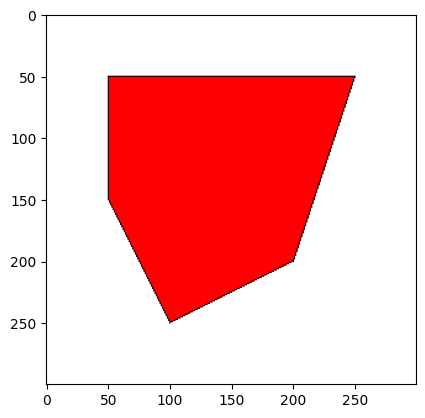

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

width, height=300,300
canvas=np.ones((height, width,3),dtype=np.uint8)*255

def draw_polygon(vertices):
  for i in range(len(vertices)):
    x1,y1=vertices[i]
    x2,y2=vertices[(i+1)%len(vertices)]
    bresenham_line(x1,y1,x2,y2)

def bresenham_line(x1,y1,x2,y2):
  dx=abs(x2-x1)
  dy=abs(y2-y1)
  x, y=x1, y1
  sx=1 if x2>x1 else -1
  sy=1 if y2>y1 else -1
  if dx>dy:
    err=dx/2
    while x!=x2:
      canvas[y,x]=[0,0,0]
      err-=dy
      if err<0:
        y+=sy
        err+=dx
      x+=sx
    canvas[y,x]=[0,0,0]
  else:
    err=dy/2
    while y!=y2:
      canvas[y,x]=[0,0,0]
      err-=dx
      if err<0:
        x+=sx
        err+=dy
      y+=sy
    canvas[y,x]=[0,0,0]

def flood_fill(x,y,target_color,fill_color):
  if x<0 or x>=width or y<0 or y>=height:
    return
  if not np.array_equal(canvas[y,x],target_color):
    return
  canvas[y,x]=fill_color
  flood_fill(x+1,y,target_color,fill_color)
  flood_fill(x-1,y,target_color,fill_color)
  flood_fill(x,y+1,target_color,fill_color)
  flood_fill(x,y-1,target_color,fill_color)

def flood_fill_iter(x,y,target_color,fill_color):
  target=np.array(target_color,dtype=np.uint8)
  fill=np.array(fill_color)
  if x<0 or x>=width or y<0 or y>=height:
    return
  if not np.array_equal(canvas[y,x],target):
    return
  q=deque([(x,y)])
  while q:
    cx,cy=q.popleft()
    if cx<0 or cx>=width or cy<0 or cy>=height:
      continue
    if np.array_equal(canvas[cy,cx],target):
      canvas[cy,cx]=fill_color
      q.append((cx+1,cy))
      q.append((cx-1,cy))
      q.append((cx,cy+1))
      q.append((cx,cy-1))


vertices=[(50,50),(250,50),(200,200),(100,250),(50,150)]
draw_polygon(vertices)
flood_fill_iter(150,100,[255,255,255],[255,0,0])
plt.imshow(canvas)
plt.show()